#                                   APP RATING PREDICTION



# Objective: Make a model to predict the app rating, with other information about the app provided.

# importing the libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# importing csv files
df= pd.read_csv(r"C:\ravi\python project\googleplaystore.csv")

In [3]:

df= pd.read_csv(r"C:\ravi\python project\googleplaystore.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# checking the null value of the data


In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# Droping null values in each columns using any function


In [6]:
df.dropna(axis=0, inplace=True)

# importing all columns name


In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# checking the type of the column


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1023.8+ KB


# Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

In [9]:
 df = df[df.Size != 'Varies with device']


In [10]:
df['Size']=df['Size'].apply(lambda x:float( str(x).replace('k', ''))/1000 if 'k' in str(x) else x)

In [11]:
df['Size']=df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [12]:
# checking if m removed in size 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# QUESTION 2:Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [13]:
df['Reviews']=df['Reviews'].astype(float)

In [14]:
df.info()
# rechecking the info to comfirm that the 

  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   object 
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), object(11)
memory usage: 844.7+ KB


# QUESTION3:Installs field is currently stored as string and has values like 1,000,000+. 

 Installs field is currently stored as string and has values like 1,000,000+.
 Treat 1,000,000+ as 1,000,000
 remove ‘+’, ‘,’ from the field, convert it to integer

In [15]:

df.Installs = df.Installs.apply(lambda x: x[:-1] if x[-1] == '+' else x).apply(
                                lambda x: ''.join(x.split(','))).astype('int')

In [46]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# QUESTION4:Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

using lamda function to remove dollar sign from the price

In [47]:

df['Price']=df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x).astype(float)

 confirming if the dollar sign removed

In [48]:
df['Price'].iloc[200:250]
 


271    0.00
272    0.00
273    0.00
275    0.00
276    0.00
277    0.00
278    0.00
279    0.00
280    0.00
281    0.00
283    0.00
287    0.00
288    0.00
289    0.00
290    4.99
291    4.99
293    0.00
295    0.00
296    0.00
298    0.00
299    0.00
300    0.00
301    0.00
302    0.00
303    0.00
304    0.00
305    0.00
306    0.00
307    0.00
308    0.00
309    0.00
310    0.00
311    0.00
312    0.00
313    0.00
314    0.00
316    0.00
317    0.00
318    0.00
319    0.00
322    0.00
323    0.00
324    0.00
325    0.00
326    0.00
328    0.00
329    0.00
331    0.00
332    0.00
333    0.00
Name: Price, dtype: float64

In [49]:
# checking the type of the price
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int32  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 814.5+ KB


converting price in to float

In [50]:

df['Price']=df['Price'].astype(float)


 conforming if the type of the price converted into float

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   float64
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int32  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 814.5+ KB


# QUESTION5.1:Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [52]:
df.Rating.describe()


count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

 min value is 1 and maximun value is 5 rating does not required any cleaning 

# QUESTION 5.2:Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [53]:
df.Installs.describe()

count    7.723000e+03
mean     8.424070e+06
std      5.015742e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [54]:
df_rating=df[(df['Rating'] >=1)& (df['Rating']<=5)]

In [55]:
df_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.700,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,0.619,1000,Free,0.0,Everyone,Books & Reference,23-Mar-14,0.8,2.2 and up
10833,FR Calculator,FAMILY,4.0,7.0,2.600,500,Free,0.0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10835,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.000,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.600,100,Free,0.0,Everyone,Education,6-Jul-18,1,4.1 and up


 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [56]:
len(df[(df['Type'] == "Free") & (df['Price']>0)])
df.shape

(7723, 13)

# Boxplot for Price

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


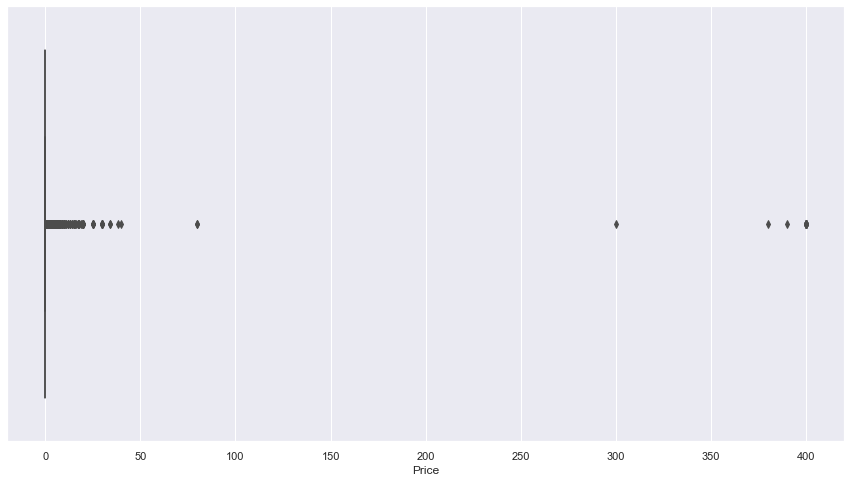

In [57]:
sns.boxplot(df.Price)
sns.set(rc={'figure.figsize':(15,8)})

->Are there any outliers?
Think about the price of usual apps on Play tore.
Since the majority of Apps on playstore are Free,
even the apps having very low price is treated as outlier.

# Boxplot for Reviews

C:\Users\ravit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


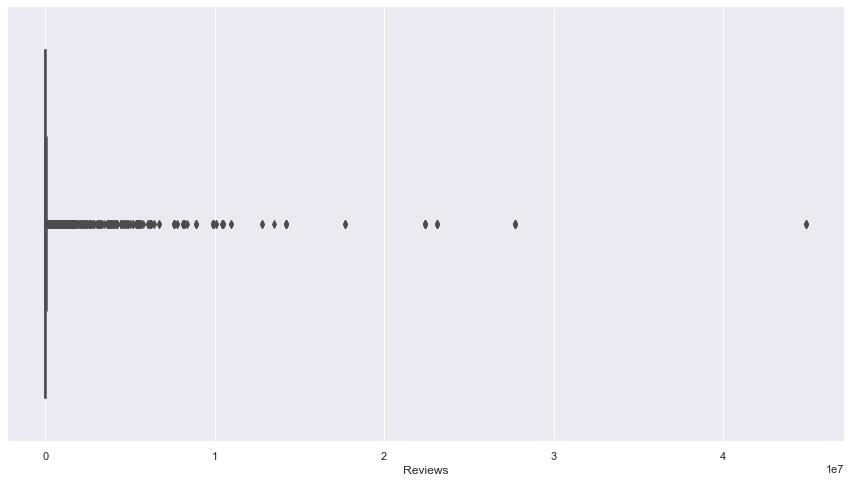

In [58]:
sns.boxplot(df.Reviews)
sns.set(rc={'figure.figsize':(15,8)})

->Are there any apps with very high number of reviews? Do the values seem right?
Yes, very few apps have very high number of reviews.
Since these apps are very few and have very high number of reviews they can skew the result.
Hence we can treat these reviews as outlier.

# Boxplot for Rating

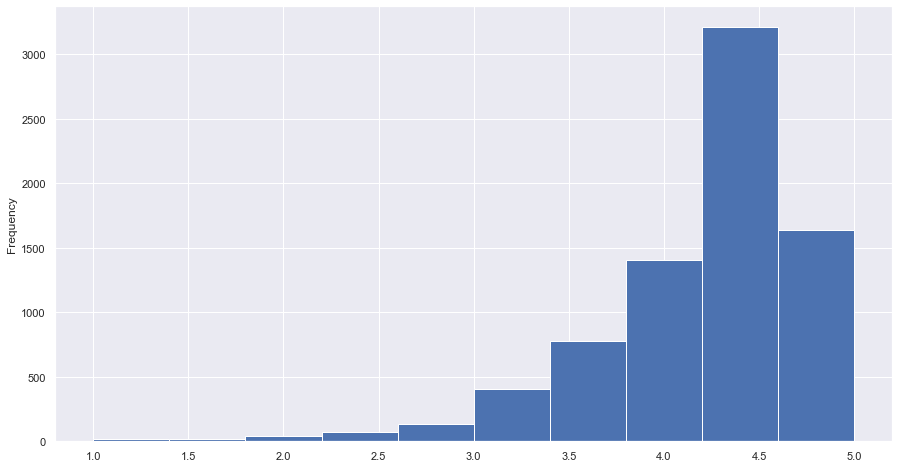

In [59]:
df.Rating.plot.hist()
sns.set(rc={'figure.figsize':(15,8)})

->How are the ratings distributed? Is it more toward higher ratings?
the higher frequency of rating in 4.5. and Most of the apps rating is bwtween  3.5 to 5 .

# Histogram for Size

In [61]:
# converting 
df["Size"]=df["Size"].astype(float)

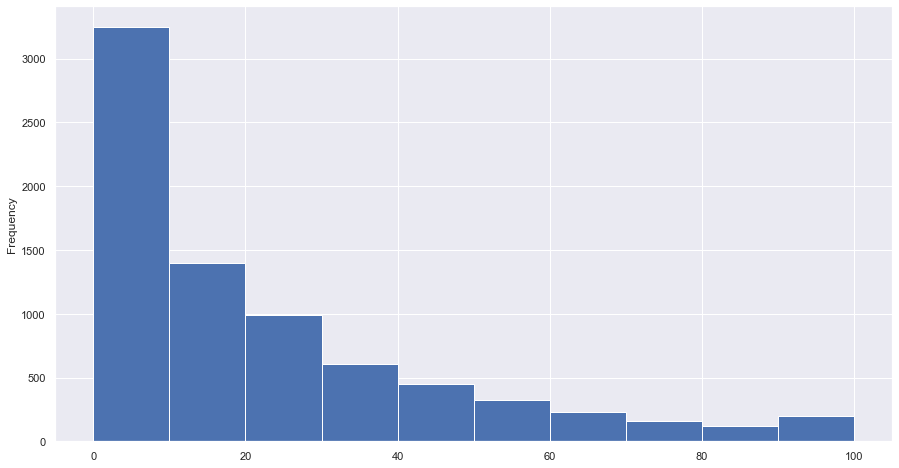

In [62]:
df.Size.plot.hist()
sns.set(rc={'figure.figsize':(15,8)})

as we can see from the plot that the very few  has size more than 1000kbs

# 6. Outlier treatment: 

 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

 Check out the records with very high price

 Is 200 indeed a high price?

 Drop these as most seem to be junk apps

In [63]:
len(df[df['Price']>200])


15

In [64]:
df[df['Price']>200]
df.shape

(7723, 13)

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [65]:
df[df['Reviews']>=2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998.0,16.0,100000000,Free,0.0,Everyone,Communication,18-Jul-18,5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892.0,11.0,500000000,Free,0.0,Everyone,Communication,8-Jun-18,9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120.0,3.3,100000000,Free,0.0,Teen,Communication,18-Jul-18,11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40.0,500000000,Free,0.0,Teen,Communication,2-Aug-18,12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988.0,11.0,500000000,Free,0.0,Everyone,Communication,8-Jun-18,9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300.0,22.0,50000000,Free,0.0,Everyone 10+,Racing,24-Jul-18,2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386.0,58.0,100000000,Free,0.0,Mature 17+,Action,24-Jul-18,3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646.0,71.0,100000000,Free,0.0,Everyone,Casual,7-Aug-18,5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923.0,25.0,10000000,Free,0.0,Teen,Simulation,11-Jun-18,1.13.12,4.1 and up


In [66]:
len(df[df['Reviews']>2000000])

219

In [67]:
df.shape

(7723, 13)

 dropping apps more than 100m installation


Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [68]:
df['Installs'].quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       100000.0
0.70      1000000.0
0.90     10000000.0
0.95     50000000.0
0.99    100000000.0
Name: Installs, dtype: float64

Looks like there are just 1% apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.
 We need to drop these.

In [70]:
len(df[df['Installs']>=1000000000])


10

# # Question 7:Decide a threshold as cutoff for outlier and drop records having values more than that

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?



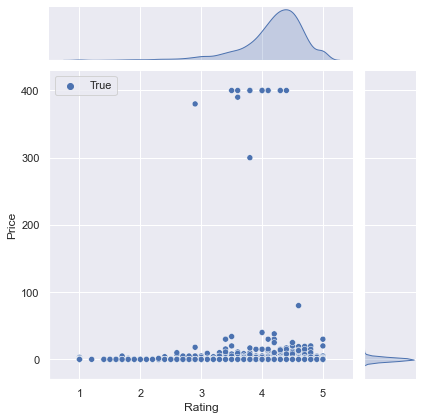

In [71]:
sns.jointplot(x='Rating',y='Price',data =df ,hue=True)
sns.set(rc={'figure.figsize':(20,8)})

as we can see from the plot that the apps with 3.5 to 5 rating have more price

->make scatter plot/joinplot for Rating vs. Size
Are heavier apps rated better?


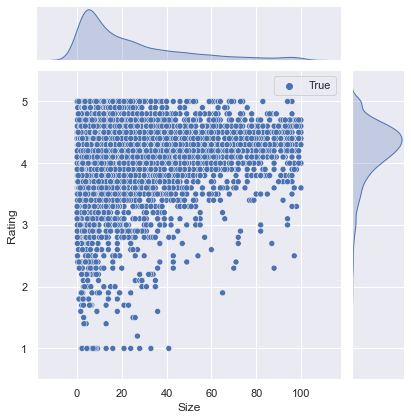

In [72]:
sns.jointplot(x='Size',y='Rating',data =df ,hue=True)
sns.set(rc={'figure.figsize':(25,15
                             )})

as we can see that price is increasing with with rating . 

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

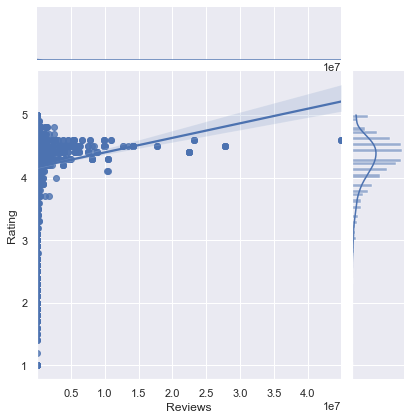

In [73]:
sns.jointplot(x='Reviews',y='Rating',data =df ,kind='reg')
sns.set(rc={'figure.figsize':(10,8)})

as we can in the plot that Review of the Apps is increased with more rating 

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

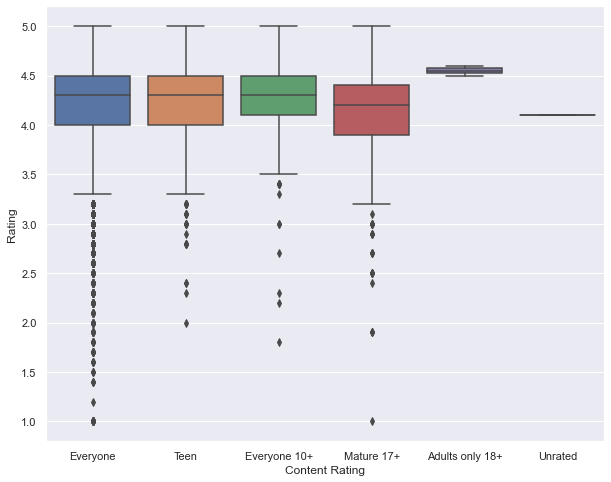

In [74]:
sns.boxplot(x='Content Rating', y='Rating', data=df)
sns.set(rc={'figure.figsize':(20,8)})

We can say there is no much difference in average rating.
Because thier most of the rating lie between 4.0 and 4.5.

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

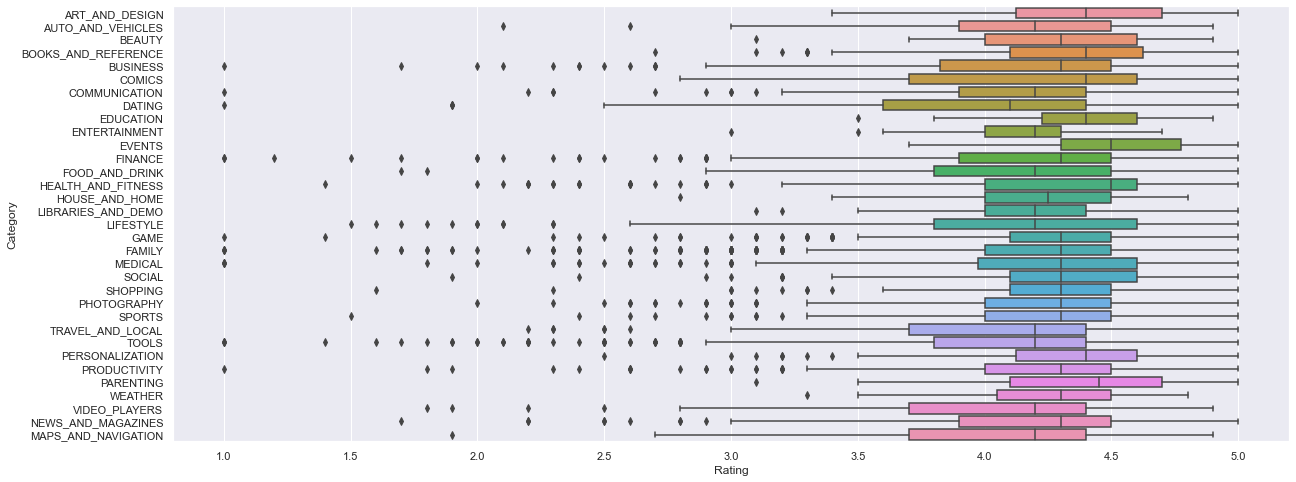

In [75]:
sns.boxplot(x='Rating',y='Category',data=df)

sns.set(rc={'figure.figsize':(20,8)})

# . Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [76]:
inp1 = df.copy()

In [77]:
inp1['Reviews ']= inp1['Reviews'].transform(np.log1p)

In [78]:
inp1['Installs'] = inp1['Installs'].transform(np.log1p)

In [79]:
inp1.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [80]:
cols = ['Type','Category', 'Genres', 'Content Rating']
inp2 = pd.get_dummies(inp1, columns=cols, drop_first= True)

# 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [81]:
from sklearn.model_selection import train_test_split


In [82]:
df_train , df_test =train_test_split(inp2,test_size=0.2,random_state=101)

In [83]:
y_train = df_train.pop('Rating')
X_train = df_train

y_test = df_test.pop('Rating')
X_test = df_test

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()

lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)

r2_score(y_train, y_train_pred)

 

0.16445741641797373

In [85]:
y_test_pred = lm.predict(X_test)
r2_score(y_test, y_test_pred)

0.1329207353609183